# PART A

In [ ]:
#TESTING
#python grade_a.py testcases/3/outputfile.txt testcases/3/weightfile.txt testcases/3/outputfile3.txt testcases/3/weightfile3.txt
#python logistic.py a data/train.csv data/test.csv testcases/3/param3.txt testcases/3/outputfile.txt testcases/3/weightfile.txt

In [21]:
import numpy as np
import pandas as pd
from numpy.linalg import norm      


train_path = 'data/train.csv'
test_path = 'data/test.csv'

train = pd.read_csv(train_path, index_col = 0)    
test = pd.read_csv(test_path, index_col = 0)


#y_train = np.array(train['Length of Stay'])
y_train=pd.get_dummies(train['Length of Stay']).to_numpy()


train = train.drop(columns = ['Length of Stay'])

#Ensuring consistency of One-Hot Encoding

data = pd.concat([train, test], ignore_index = True)
cols = train.columns
cols = cols[:-1]
data = pd.get_dummies(data, columns=cols, drop_first=True)
data = data.to_numpy()
X_train = data[:train.shape[0], :]
X_test = data[train.shape[0]:, :]

In [2]:
X_train.shape,X_test.shape

((100000, 1632), (10000, 1632))

In [3]:
X_train=np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_test=np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)
X_train.shape,X_test.shape

((100000, 1633), (10000, 1633))

In [4]:
def softmax(a):
    a=np.exp(a-np.max(a))
    return np.nan_to_num(a/(a.sum(axis=a.ndim-1).reshape(-1,1)),False)
def CE_loss(y_true,y_preds):
    gamma=1e-15
    return -np.sum(np.multiply(y_true,np.log(np.clip(y_preds,gamma,1-gamma))))/y_true.shape[0]
#np.log(np.clip(predictions, gamma, 1 - gamma)) , where gamma = 10^( -15)      

In [227]:
'''
W=np.zeros((X_test.shape[1],8))
yh=softmax(np.matmul(X_train,W))
CE_loss(y_train,yh)
dw=np.matmul(X_train.T,yh-y_train)  
W-1*dw
q=np.matmul(X_train,W-0.03*dw)[:6]
print(sm(q))
softmax(q)
'''
#softmax(np.matmul(X_train,W-0.03*dw)[:8])
#sm(np.matmul(X_train,W-0.03*dw)).shape
#softmax(np.matmul(X_train,W-0.03*dw))[0]
#CE_loss(y_train,softmax(np.matmul(X_train,W-lr*dw)))

[[0.00000000e+000 6.65682540e-249 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 5.15531744e-305 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.13975712e-267 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]]


<ipython-input-226-f4c933ad1721>:3: RuntimeWarning: invalid value encountered in true_divide
  return np.nan_to_num(a/(a.sum(axis=a.ndim-1).reshape(-1,1)),False)


array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [217]:
'''
print(q[-1])
q=q[-1]
a=np.exp(q)
#a/np.sum(a,axis=1).reshape(-1,1)
softmax(q)
#print(a)
#np.sum(a,axis=a.ndim-1).reshape(-1,1)
'''

[  381.72061701  1758.4362655   1008.82926693  -230.24087834
  -837.32782355 -1100.31141532 -1210.8027652    229.69673297]


<ipython-input-217-b55a0f19325c>:3: RuntimeWarning: overflow encountered in exp
  a=np.exp(q)


array([[0., 1., 0., 0., 0., 0., 0., 0.]])

In [218]:

import scipy
from scipy.special import softmax as sm
#sm(q)
#softmax(q)

In [7]:
num_iter=10
n=X_train.shape[0]
lr=0.01
def grad_desc(num_iter,lr,X_train,y_train):
    W=np.zeros((X_test.shape[1],8))
    for i in range(num_iter):
        #print(softmax(np.matmul(X_train,W)))
        #print(i)
        #print(np.matmul(X_train,W))
        W-=lr/(X_train.shape[0])*(np.matmul(X_train.T,softmax(np.matmul(X_train,W))-y_train))
        #print(CE_loss(y_train,softmax(np.matmul(X_train,W))))
        #print((np.matmul(X_train.T,y_train-softmax(np.matmul(X_train,W)))).shape)
    return W

def adaptive_grad_desc(num_iter,lr,X_train,y_train):
    W=np.zeros((X_test.shape[1],8))
    for i in range(num_iter):
        #print(softmax(np.matmul(X_train,W)))
        #print(i)
        #print(np.matmul(X_train,W))
        lr_=lr/((i+1)**.5)
        W-=lr_/(X_train.shape[0])*(np.matmul(X_train.T,softmax(np.matmul(X_train,W))-y_train))
        #print(CE_loss(y_train,softmax(np.matmul(X_train,W))))
        #print((np.matmul(X_train.T,y_train-softmax(np.matmul(X_train,W)))).shape)
    return W

def backtrack_grad_desc(num_iter,lr,alpha,beta,X_train,y_train):
        W=np.zeros((X_test.shape[1],8))
        lr_=lr
        for i in range(num_iter):
            #if i%100==0:
            #    print(i)
            yh=softmax(np.matmul(X_train,W))
            dw=np.matmul(X_train.T,yh-y_train)/(y_train.shape[0])
            lr=lr_
            #print(yh)
            while(CE_loss(y_train,softmax(np.matmul(X_train,W-lr*dw)))-CE_loss(y_train,yh)>
                 -alpha*lr*(np.square(np.linalg.norm(dw)))):
                lr*=beta
                
                #print(CE_loss(y_train,softmax(np.matmul(X_train,W-lr/(y_train.shape[0])*dw)))-CE_loss(y_train,yh),
                 # -alpha*lr*(np.square(np.linalg.norm(dw))))
            
                #print(lr)
            #print(lr)
            W-=lr*dw
            #print((np.matmul(X_train.T,y_train-softmax(np.matmul(X_train,W)))).shape)
        return W

In [1]:
#W=backtrack_grad_desc(num_iter,lr,0.5,.75,X_train,y_train)

In [53]:
#W=grad_desc(100,lr,X_train,y_train)

In [54]:
#W=adaptive_grad_desc(50,lr,X_train,y_train)

# PART B


In [ ]:
#TESTING
#python logistic.py b data/train.csv data/test.csv testcases/6/param6.txt testcases/6/outputfile.txt testcases/6/weightfile.txt
#python grade_b.py testcases/6/outputfile.txt testcases/6/weightfile.txt testcases/6/outputfile6.txt testcases/6/weightfile6.txt

In [2]:
import numpy as np
import pandas as pd
from numpy.linalg import norm      


train_path = 'data/train.csv'
test_path = 'data/test.csv'

train = pd.read_csv(train_path, index_col = 0)    
test = pd.read_csv(test_path, index_col = 0)


#y_train = np.array(train['Length of Stay'])
y_train=pd.get_dummies(train['Length of Stay']).to_numpy()


train = train.drop(columns = ['Length of Stay'])

#Ensuring consistency of One-Hot Encoding

data = pd.concat([train, test], ignore_index = True)
cols = train.columns
cols = cols[:-1]
data = pd.get_dummies(data, columns=cols, drop_first=True)
data = data.to_numpy()
X_train = data[:train.shape[0], :]
X_test = data[train.shape[0]:, :]

In [3]:
X_train.shape,X_test.shape

((100000, 1632), (10000, 1632))

In [4]:
X_train=np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_test=np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)
X_train.shape,X_test.shape

((100000, 1633), (10000, 1633))

In [5]:
def softmax(a):
    a=np.exp(a-np.max(a))
    return np.nan_to_num(a/(a.sum(axis=a.ndim-1).reshape(-1,1)),False)
def CE_loss(y_true,y_preds):
    gamma=1e-15
    return -np.sum(np.multiply(y_true,np.log(np.clip(y_preds,gamma,1-gamma))))/y_true.shape[0]
#np.log(np.clip(predictions, gamma, 1 - gamma)) , where gamma = 10^( -15)      

In [28]:
def grad_desc(bs,num_iter,lr,X_train,y_train):
    W=np.zeros((X_test.shape[1],8))
    for i in range(num_iter):
        for j in range(X_train.shape[0]//bs):
            #print(X_train[j*bs:(j+1)*bs,:].shape,y_train[j*bs:(j+1)*bs,:].shape)
            #print(softmax(np.matmul(X_train,W)))
            #print(i)
            #print(np.matmul(X_train,W))
            x,y=X_train[j*bs:(j+1)*bs,:],y_train[j*bs:(j+1)*bs,:]
            W-=lr/(bs)*(np.matmul(x.T,softmax(np.matmul(x,W))-y))
            #print(CE_loss(y_train,softmax(np.matmul(X_train,W))))
            #print((np.matmul(X_train.T,y_train-softmax(np.matmul(X_train,W)))).shape)
    return W

def adaptive_grad_desc(bs,num_iter,lr,X_train,y_train):
    W=np.zeros((X_test.shape[1],8))
    for i in range(num_iter):
        for j in range(X_train.shape[0]//bs):
            #print(softmax(np.matmul(X_train,W)))
            #print(i)
            #print(np.matmul(X_train,W))
            lr_=lr/((i+1)**.5)
            x,y=X_train[j*bs:(j+1)*bs,:],y_train[j*bs:(j+1)*bs,:]
            W-=lr_/(bs)*(np.matmul(x.T,softmax(np.matmul(x,W))-y))
            #print(CE_loss(y_train,softmax(np.matmul(X_train,W))))
            #print((np.matmul(X_train.T,y_train-softmax(np.matmul(X_train,W)))).shape)
    return W

def backtrack_grad_desc(bs,num_iter,lr,alpha,beta,X_train,y_train):
        
        W=np.zeros((X_test.shape[1],8))
        lr_=lr
        for i in range(num_iter):
        #    if(i%100==0):
         #       print(i)
            yh=softmax(np.matmul(X_train,W))
            dw=np.matmul(X_train.T,yh-y_train)/(y_train.shape[0])
            lr=lr_
            while(CE_loss(y_train,softmax(np.matmul(X_train,W-lr*dw)))-CE_loss(y_train,yh)>
                 -alpha*lr*(np.square(np.linalg.norm(dw)))):
                lr*=beta
            for j in range(X_train.shape[0]//bs):
                x,y=X_train[j*bs:(j+1)*bs,:],y_train[j*bs:(j+1)*bs,:]
                yh=softmax(np.matmul(x,W))
                dw=np.matmul(x.T,yh-y)/bs  
                
                #print(yh)
                #while(CE_loss(y,softmax(np.matmul(x,W-lr*dw)))-CE_loss(y,yh)>
                #     -alpha*lr*(np.square(np.linalg.norm(dw)))):
                 #   lr*=beta
                #print(lr)
                W-=lr*dw
            #print((np.matmul(X_train.T,y_train-softmax(np.matmul(X_train,W)))).shape)
        return W

In [29]:
grad_desc(20000,1,0.01,X_train,y_train)

array([[ 1.03208851e-03,  5.33137761e-03,  2.73070905e-03, ...,
        -3.70694522e-03, -4.14588304e-03,  2.53937227e-03],
       [-5.23257385e-05, -2.14131975e-05, -1.47913456e-05, ...,
        -5.53739612e-05, -5.80063880e-05,  2.84768967e-04],
       [ 1.66359623e-05,  4.35019747e-04,  1.96520388e-04, ...,
        -2.42619172e-04, -2.83143724e-04,  1.20899990e-04],
       ...,
       [-6.26734764e-08, -6.36211293e-08,  4.36992608e-07, ...,
        -6.18863733e-08, -6.18298729e-08, -6.26508072e-08],
       [-6.27748479e-08,  4.35947677e-07, -6.32069453e-08, ...,
        -6.16188780e-08, -6.15283137e-08, -6.27881883e-08],
       [ 6.75579631e-04,  1.47704905e-03,  9.64675432e-04, ...,
        -1.78033082e-03, -2.14124788e-03,  2.29129982e-03]])

In [21]:
X_train.shape[0]//10000

10

# PART C

In [10]:
import numpy as np
import pandas as pd
from numpy.linalg import norm
from matplotlib import pyplot as plt
from time import time
from scipy.special import softmax as sm   


train_path = 'data/train_large.csv'
test_path = 'data/test.csv'

train = pd.read_csv(train_path, index_col = 0)    
test = pd.read_csv(test_path, index_col = 0)


#y_train = np.array(train['Length of Stay'])
y_train=pd.get_dummies(train['Length of Stay']).to_numpy()


train = train.drop(columns = ['Length of Stay'])

#Ensuring consistency of One-Hot Encoding

data = pd.concat([train, test], ignore_index = True)
cols = train.columns
cols = cols[:-1]
data = pd.get_dummies(data, columns=cols, drop_first=True)
data = data.to_numpy()
X_train = data[:train.shape[0], :]
X_test = data[train.shape[0]:, :]

In [11]:
X_train.shape,X_test.shape

((1600000, 1662), (10000, 1662))

In [12]:
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

In [13]:
X_train=np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_train.shape
# X_train=np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
# X_test=np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)
# X_train.shape,X_test.shape

(1600000, 1663)

In [5]:
def softmax(a):
    a=np.exp(a)
    return np.nan_to_num(a/(a.sum(axis=a.ndim-1).reshape(-1,1)),False)
def CE_loss(y_true,y_preds):
    gamma=1e-15
    return -np.sum(np.multiply(y_true,np.log(np.clip(y_preds,gamma,1-gamma))))/y_true.shape[0]
#np.log(np.clip(predictions, gamma, 1 - gamma)) , where gamma = 10^( -15) 
def Kfold_CV(k,X):
    #np.random.shuffle(X)
   
    subsets=np.array_split(X,k)
    splits=[]
    for i in range(k):
        test=subsets[i]
        if i==0:
            train=np.vstack(subsets[i+1:])
            train=train.reshape((-1,train.shape[-1]))
        elif i==k-1:
            train=np.vstack(subsets[:i])
            train=train.reshape((-1,train.shape[-1]))
        else:    
            train=np.concatenate((np.vstack(subsets[:i]),np.vstack(subsets[i+1:])))
            train=train.reshape((-1,train.shape[-1]))
        x_test,y_test=test[:,:-1],test[:,-1]
        x_train,y_train=train[:,:-1],train[:,-1]
        splits.append((x_train,x_test,y_train,y_test))
    return splits

In [6]:
def grad_desc(bs,num_iter,lr,X_train,y_train,x_test,y_test):
    lmin=float('inf')
    iteration=0
    l_tr=float('inf')
    Wmin=0
    L=[]
    L_val=[]
    R=[]
    count=0
    W=np.zeros((X_train.shape[1],8))
    t=time()
    for i in range(num_iter):
        count+=1
        for j in range(X_train.shape[0]//bs):
            #print(X_train[j*bs:(j+1)*bs,:].shape,y_train[j*bs:(j+1)*bs,:].shape)
            #print(softmax(np.matmul(X_train,W)))
            #print(i)
            #print(np.matmul(X_train,W))
            x,y=X_train[j*bs:(j+1)*bs,:],y_train[j*bs:(j+1)*bs,:]
            W-=lr/(bs)*(np.matmul(x.T,softmax(np.matmul(x,W))-y))
            #print(CE_loss(y_train,softmax(np.matmul(X_train,W))))
            #print((np.matmul(X_train.T,y_train-softmax(np.matmul(X_train,W)))).shape)
        l=CE_loss(y_test,softmax(np.matmul(x_test,W)))   
        L_val.append(l)
        l_t=CE_loss(y_train,softmax(np.matmul(X_train,W)))
        L.append(l_t)
        R.append(time()-t)
        print("iteration:"+str(i+1)+" train: "+ str(l_t)+" test: "+str(l))
        l_tr=min(l_tr,l_t)
        if(l_t>.1+l_tr):
            # If train loss is increasing
            break
        if(l<lmin):
            if len(L)>1:
                if(l_t<0.02+L[-2]):
                    # Checking thar train loss is not increasing
                    count=0
                    lmin=l
                    iteration=i+1
                    Wmin=W        
            else:
                
                count=0
                lmin=l
                iteration=i+1
                Wmin=W 
        #Earlystopping    
        if(count>15):
            break
        
    return Wmin,L,L_val,R,lmin,iteration

def adaptive_grad_desc(bs,num_iter,lr,X_train,y_train):
    lmin=float('inf')
    Wmin=0
    L=[]
    R=[]
    W=np.zeros((X_train.shape[1],8))
    t=time()
    for i in range(num_iter):
        for j in range(X_train.shape[0]//bs):
            #print(softmax(np.matmul(X_train,W)))
            #print(i)
            #print(np.matmul(X_train,W))
            lr_=lr/((i+1)**.5)
            x,y=X_train[j*bs:(j+1)*bs,:],y_train[j*bs:(j+1)*bs,:]
            W-=lr_/(bs)*(np.matmul(x.T,softmax(np.matmul(x,W))-y))
            #print(CE_loss(y_train,softmax(np.matmul(X_train,W))))
            #print((np.matmul(X_train.T,y_train-softmax(np.matmul(X_train,W)))).shape)
        l=CE_loss(y_train,softmax(np.matmul(X_train,W)))
        if(l<lmin):
            lmin=l
            Wmin=W
        if(lmin*4<l):
            break
        L.append(l)
        R.append(time()-t)
        print(i+1,l)
    return Wmin,L,R,lmin

def backtrack_grad_desc(bs,num_iter,lr,alpha,beta,X_train,y_train,x_test,y_test):
         
    lr_=lr
    lmin=float('inf')
    iteration=0
    l_tr=float('inf')
    Wmin=0
    L=[]
    L_val=[]
    R=[]
    count=0
    W=np.zeros((X_train.shape[1],8))
    t=time()
    for i in range(num_iter):
    #    if(i%100==0):
     #       print(i)
        yh=softmax(np.matmul(X_train,W))
        dw=np.matmul(X_train.T,yh-y_train)/(y_train.shape[0])
#         lr=lr_
        #print(CE_loss(y_train,softmax(np.matmul(X_train,W-lr*dw)))-CE_loss(y_train,yh),-alpha*lr*(np.square(np.linalg.norm(dw))))
        while(CE_loss(y_train,softmax(np.matmul(X_train,W-lr*dw)))-CE_loss(y_train,yh)>
             -alpha*lr*(np.square(np.linalg.norm(dw)))):
            lr*=beta
            print("Learning Rate:" +str(lr))
        for j in range(X_train.shape[0]//bs):
            x,y=X_train[j*bs:(j+1)*bs,:],y_train[j*bs:(j+1)*bs,:]
            yh=softmax(np.matmul(x,W))
            dw=np.matmul(x.T,yh-y)/bs  

            #print(yh)
            #while(CE_loss(y,softmax(np.matmul(x,W-lr*dw)))-CE_loss(y,yh)>
            #     -alpha*lr*(np.square(np.linalg.norm(dw)))):
             #   lr*=beta
            #print(lr)
            W-=lr*dw
        l=CE_loss(y_test,softmax(np.matmul(x_test,W)))   
        L_val.append(l)
        l_t=CE_loss(y_train,softmax(np.matmul(X_train,W)))
        L.append(l_t)
        R.append(time()-t)
        print("iteration:"+str(i+1)+" train: "+ str(l_t)+" test: "+str(l))
        l_tr=min(l_tr,l_t)
        if(l_t>.1+l_tr):
            break
        if(l<lmin):
            if len(L)>1:
                if(l_t<0.02+L[-2]):
                    count=0
                    lmin=l
                    iteration=i+1
                    Wmin=W        
            else:
                
                count=0
                lmin=l
                iteration=i+1
                Wmin=W 
        #Earlystopping    
        if(count>15):
            break 
        #print((np.matmul(X_train.T,y_train-softmax(np.matmul(X_train,W)))).shape)
    return Wmin,L,L_val,R,lmin,iteration

In [7]:
# train=np.concatenate((X_train,y_train),axis=1)
# np.random.shuffle(train)
# X_train,y_train=train[:,:-8],train[:,-8:]
# del train
# X_train.shape,y_train.shape

In [8]:
# Hyperparmters and batch size can be varied to find the best model

#1 FOLD TESTING
bs=300

#Can be used to test normal gradient descent
#W,L,L_val,runtime,loss,iteration=grad_desc(bs,500,0.9,X_train[:1400000],y_train[:1400000],X_train[1400000:],y_train[1400000:])

#Can be used to test backtrack gradient descent
W,L,L_val,runtime,loss,iteration=backtrack_grad_desc(bs,500,1.5,.6,.95,X_train[:1400000],y_train[:1400000],X_train[1400000:],y_train[1400000:])
#W,L,L_val,runtime,loss,iteration=backtrack_grad_desc(bs,500,1.5,.6,.95,X_train[:80000],y_train[:80000],X_train[80000:],y_train[80000:])

print("Early stopping at Loss: "+str(loss)+" Iteration: "+str(iteration))


Learning Rate:1.4249999999999998
Learning Rate:1.3537499999999998
Learning Rate:1.2860624999999997
Learning Rate:1.2217593749999995
iteration:1 train: 1.6025458248964577 test: 1.6219587117976508
Learning Rate:1.1606714062499994
Learning Rate:1.1026378359374993
Learning Rate:1.0475059441406243
Learning Rate:0.995130646933593
Learning Rate:0.9453741145869133
Learning Rate:0.8981054088575676
Learning Rate:0.8532001384146892
Learning Rate:0.8105401314939548
iteration:2 train: 1.562091779424268 test: 1.5867551055372735
iteration:3 train: 1.5486265303117506 test: 1.5767924219793121
iteration:4 train: 1.539284716891091 test: 1.5702886700892218
iteration:5 train: 1.5321939892509864 test: 1.5655998128190045
iteration:6 train: 1.5265052631347034 test: 1.5619994315683594
iteration:7 train: 1.5217659110043666 test: 1.559110756011739
iteration:8 train: 1.5177079018918487 test: 1.5567164490593424
iteration:9 train: 1.5141602426090695 test: 1.554681230274159
iteration:10 train: 1.511007642224885 test

iteration:124 train: 1.4266491043731422 test: 1.50741815234953
iteration:125 train: 1.4263131900504071 test: 1.5072053021126945
iteration:126 train: 1.4259794221739115 test: 1.506993504700529
iteration:127 train: 1.4256477717490073 test: 1.5067827491288879
iteration:128 train: 1.425318210403566 test: 1.5065730246144027
iteration:129 train: 1.4249907103693817 test: 1.506364320568594
iteration:130 train: 1.4246652444642798 test: 1.5061566265922408
iteration:131 train: 1.424341786074917 test: 1.5059499324699954
iteration:132 train: 1.4240203091402268 test: 1.5057442281652236
iteration:133 train: 1.4237007881354937 test: 1.5055395038150647
iteration:134 train: 1.4233831980570122 test: 1.505335749725699
iteration:135 train: 1.4230675144073162 test: 1.5051329563678042
iteration:136 train: 1.422753713180955 test: 1.5049311143721955
iteration:137 train: 1.4224417708507782 test: 1.5047302145256447
iteration:138 train: 1.4221316643547173 test: 1.5045302477668583
iteration:139 train: 1.4218233710

iteration:252 train: 1.395066779163477 test: 1.486270282798976
iteration:253 train: 1.3948805844139993 test: 1.4861401284802316
iteration:254 train: 1.3946950312615511 test: 1.4860103735014605
iteration:255 train: 1.3945101153181299 test: 1.4858810155154183
iteration:256 train: 1.394325832241412 test: 1.4857520521946774
iteration:257 train: 1.3941421777341045 test: 1.4856234812314006
iteration:258 train: 1.393959147543301 test: 1.4854953003371116
iteration:259 train: 1.3937767374598604 test: 1.485367507242477
iteration:260 train: 1.3935949433177828 test: 1.4852400996970874
iteration:261 train: 1.3934137609936075 test: 1.485113075469246
iteration:262 train: 1.393233186405824 test: 1.484986432345757
iteration:263 train: 1.3930532155142787 test: 1.4848601681317184
iteration:264 train: 1.392873844319612 test: 1.4847342806503216
iteration:265 train: 1.392695068862685 test: 1.4846087677426483
iteration:266 train: 1.3925168852240377 test: 1.4844836272674762
iteration:267 train: 1.392339289523

iteration:380 train: 1.3753124981927556 test: 1.4719766067661393
iteration:381 train: 1.3751835750567787 test: 1.4718805930657783
iteration:382 train: 1.3750549624324768 test: 1.471784792594662
iteration:383 train: 1.3749266588521596 test: 1.4716892044215042
iteration:384 train: 1.374798662858541 test: 1.471593827621068
iteration:385 train: 1.3746709730046378 test: 1.471498661274115
iteration:386 train: 1.3745435878536776 test: 1.471403704467356
iteration:387 train: 1.374416505978999 test: 1.4713089562934023
iteration:388 train: 1.374289725963956 test: 1.471214415850718
iteration:389 train: 1.3741632464018283 test: 1.4711200822435702
iteration:390 train: 1.3740370658957275 test: 1.4710259545819835
iteration:391 train: 1.3739111830585022 test: 1.4709320319816912
iteration:392 train: 1.3737855965126518 test: 1.4708383135640901
iteration:393 train: 1.3736603048902352 test: 1.4707447984561934
iteration:394 train: 1.373535306832781 test: 1.4706514857905855
iteration:395 train: 1.37341060099

500 1.461757546164663


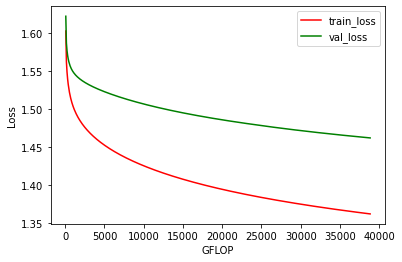

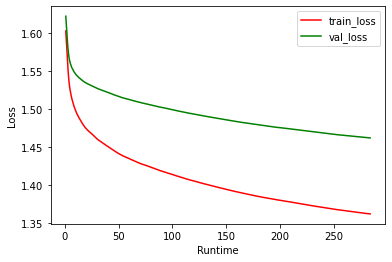

In [9]:
print(len(L),loss)
gflop=1400000*(33*X_train.shape[1]+16*X_train.shape[1]/bs+1624)/10**9
plt.clf()
plt.plot([gflop*(i+1) for i in range(len(L)-1)],L[:-1],color='r', label='train_loss')
plt.plot([gflop*(i+1) for i in range(len(L)-1)],L_val[:-1],color='g', label='val_loss')
plt.xlabel('GFLOP')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()
plt.plot(runtime[:-1],L[:-1],color='r', label='train_loss')
plt.plot(runtime[:-1],L_val[:-1],color='g', label='val_loss')
plt.legend()
plt.xlabel('Runtime')
plt.ylabel('Loss')
plt.show()


In [ ]:
##KFOLD TESTING
# f=0
#splits=Kfold_CV(5,np.concatenate((X-train,y_train),axis=1))
#e=0
# for (x_train,x_test,y_train,y_test) in splits:
#     f+=1
#     #train_=np.concatenate((x_train,y_train.reshape((-1,1))),axis=1)
#     #z = np.abs(stats.zscore(train_[:,1:]))
#     #x_train = x_train[(z < 3).all(axis=1)]
#     #y_train=y_train[(z<3).all(axis=1)]
#     bs=1000
#     temp_w,L,L_val,runtime,loss,iteration=grad_desc(bs,400,10,x_train,y_train,x_test,y_test)
#     flop=x_train.shape[0]*(33*x_test.shape[1]+16*x_test.shape[1]/bs+1624)
#     plt.clf()
#     plt.plot([flop*(i+1) for i in range(len(L))],L,color='r', label='train_loss')
#     plt.plot([flop*(i+1) for i in range(len(L))],L_val,color='b', label='val_loss')
#     plt.xlabel('FLOP')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.show()
#     plt.clf()
#     plt.plot(runtime,L,color='r', label='train_loss')
#     plt.plot(runtime,L_val,color='b', label='val_loss')
#     plt.legend()
#     plt.xlabel('Runtime')
#     plt.ylabel('Loss')
#     plt.show()
    
#     e+=loss
#     print("Fold: "+str(f)+"Loss: "+str(loss)+"Iteration: "+str(iteration))
# e/=5

# print("Loss: "+str(e))

# PART D

In [1]:
# Commented out code was run during experimenting

import numpy as np
import pandas as pd
from numpy.linalg import norm      
from boruta import BorutaPy
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest,f_classif, mutual_info_classif,chi2,SelectFdr,SelectFpr,SelectFwe,SelectPercentile
from category_encoders.target_encoder import TargetEncoder 
from category_encoders.cat_boost import CatBoostEncoder 
from category_encoders.basen import BaseNEncoder 
from category_encoders.backward_difference import BackwardDifferenceEncoder
from category_encoders.glmm import GLMMEncoder
from category_encoders.helmert import HelmertEncoder
from category_encoders.wrapper import NestedCVWrapper, PolynomialWrapper
from category_encoders.count import CountEncoder
from category_encoders.james_stein import JamesSteinEncoder
from category_encoders.polynomial import PolynomialEncoder
from category_encoders.sum_coding import SumEncoder
from category_encoders.woe import WOEEncoder
from sklearn.preprocessing import PolynomialFeatures
from scipy.special import softmax as sm

In [ ]:

train_path = 'data/train_large.csv'
test_path = 'data/test.csv'

train_df = pd.read_csv(train_path, index_col = 0)    
test_df = pd.read_csv(test_path, index_col = 0)
train_df.insert(0, 'Intercept', 1)
test_df.insert(0, 'Intercept', 1)

#y_train = np.array(train['Length of Stay'])
y_train=pd.get_dummies(train_df['Length of Stay']).to_numpy()


train_df=train_df.drop(columns = ['Length of Stay'])

# for c in train.columns:
#     train[c] = (train[c]-train[c].mean())/train[c].std() 


X_train=train_df.to_numpy()
X_test=test_df.to_numpy()

In [5]:
def agg_cat(df,cat_col,num_col):
    "min"
    a = df.groupby(cat_col)[num_col].agg(["std","max","mean"]).reset_index()
    a.columns = [cat_col] + ["grpby_"+ str(cat_col)+ "_" + str(a.columns[i]) +  "_" + str(num_col) for i in range(1,len(a.columns))]
    return df.merge(a,on = cat_col, how="left")
# ,pd.Series.nunique
def agg_cat1(df,cat_col,num_col):
    a = df.groupby(cat_col)[num_col].agg([pd.Series.mode]).reset_index()
    a.columns = [cat_col] + ["grpby_"+ str(cat_col)+ "_" + str(a.columns[i]) +  "_" + str(num_col) for i in range(1,len(a.columns))]
    return df.merge(a,on = cat_col, how="left")

In [ ]:
agg_cat1(train_df,'APR Risk of Mortality','APR Severity of Illness Code').iloc[:,-1].value_counts()

In [9]:
# (train_df['APR Medical Surgical Description'].astype('str') + "_" + train_df['APR Severity of Illness Code'].astype('str')).nunique()
# (train_df['Age Group'].astype('str') + "_" + train_df['APR Severity of Illness Code'].astype('str')).nunique()
# (train_df["APR Risk of Mortality"].astype('str') + "_" + train_df['APR Severity of Illness Code'].astype('str')).nunique()
# (train_df['Emergency Department Indicator'].astype('str') + "_" + train_df['APR Severity of Illness Code'].astype('str')).nunique()
# (train_df['APR MDC Code'].astype('str') + "_" + train_df['APR Severity of Illness Code'].astype('str')).nunique()
# (train_df['Birth Weight'].astype('str') + "_" + train_df['APR Severity of Illness Code'].astype('str')).nunique()
# (train_df["Payment Typology 1"].astype('str') + "_" + train_df['APR Severity of Illness Code'].astype('str')).nunique()
# (train_df['Patient Disposition'].astype('str') + "_" + train_df['APR Severity of Illness Code'].astype('str')).nunique()
# (train_df['APR Medical Surgical Description'].astype('str') + "_" + train_df['Age Group'].astype('str')).nunique()
# (train_df["APR Risk of Mortality"].astype('str') + "_" + train_df['Age Group'].astype('str')).nunique()
# (train_df['Emergency Department Indicator'].astype('str') + "_" + train_df['Age Group'].astype('str')).nunique()
# (train_df['APR MDC Code'].astype('str') + "_" + train_df['Age Group'].astype('str')).nunique()



#Combmining 2 categorical features to create single new cat feature. 
a=pd.get_dummies(train_df['APR Medical Surgical Description'].astype('str') + "_" + train_df['APR Severity of Illness Code'].astype('str'),drop_first=True)
a.head()


,1_2,1_3,1_4,2_1,2_2,2_3,2_4
0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0


In [298]:
a=agg_cat1(train_df,'APR Medical Surgical Description','APR Severity of Illness Code').iloc[:,-1:].head()
a

,grpby_APR Risk of Mortality_nunique_APR Severity of Illness Code
0,4
1,4
2,4
3,4
4,4


In [3]:

train_path = 'data/train_large.csv'
test_path = 'data/test.csv'

train_df = pd.read_csv(train_path, index_col = 0)    
test_df = pd.read_csv(test_path, index_col = 0)
train_df.insert(0, 'Intercept', 1)
test_df.insert(0, 'Intercept', 1)

#y_train = np.array(train['Length of Stay'])
y_train=pd.get_dummies(train_df['Length of Stay']).to_numpy()


train_df=train_df.drop(columns = ['Length of Stay'])

# for c in train.columns:
#     train[c] = (train[c]-train[c].mean())/train[c].std() 


X_train=train_df.to_numpy()
X_test=test_df.to_numpy()


fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train,np.argmax(y_train,axis=1)+1)
X_train_fs = fs.transform(X_train)
# X_test_fs = fs.transform(X_test)
selected_features_1=list(np.argsort(fs.scores_))[::-1]
print(dict(zip(train_df.columns[selected_features_1],fs.scores_[selected_features_1])))

C:\Users\Asus\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


{'Intercept': nan, 'APR Severity of Illness Code': 63670.01212891464, 'Total Costs': 50469.19134835712, 'Age Group': 21887.026356797312, 'Birth Weight': 18395.62556615822, 'Patient Disposition': 16186.619716054778, 'APR Risk of Mortality': 15168.206251607278, 'Emergency Department Indicator': 10124.817370954084, 'APR DRG Code': 4574.3678857166415, 'APR MDC Code': 4505.790690175739, 'CCS Procedure Code': 2403.561850228746, 'Gender': 2326.8365704664548, 'CCS Diagnosis Code': 2250.158015539191, 'Payment Typology 2': 2061.6122866550945, 'APR Medical Surgical Description': 1638.2148187626583, 'Payment Typology 1': 981.104910106778, 'Type of Admission': 975.1928924516728, 'Ethnicity': 454.28921483237747, 'Payment Typology 3': 431.8498100168543, 'Facility Id': 323.2993874957999, 'Race': 221.08032069500962, 'Operating Certificate Number': 174.83142117827705, 'Hospital County': 156.17469775989812, 'Zip Code - 3 digits': 138.87376795540308, 'Health Service Area': 112.86452492047849, 'Facility Na

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [8]:


train_path = 'data/train_large.csv'
test_path = 'data/test.csv'

train_df = pd.read_csv(train_path, index_col = 0)    
test_df = pd.read_csv(test_path, index_col = 0)
train_df.insert(0, 'Intercept', 1)
test_df.insert(0, 'Intercept', 1)

#y_train = np.array(train['Length of Stay'])
y_train=pd.get_dummies(train_df['Length of Stay']).to_numpy()


train_df=train_df.drop(columns = ['Length of Stay'])


# for c in train.columns:
#     train[c] = (train[c]-train[c].mean())/train[c].std() 
temp=None
#Ensuring consistency of One-Hot Encoding
temp = pd.concat([train_df, test_df], ignore_index = True)
cols = train_df.columns[:-1]

train_df1=pd.concat([train_df['APR Medical Surgical Description'].astype('str') + "_" + train_df['APR Severity of Illness Code'].astype('str'),
                train_df['Age Group'].astype('str') + "_" + train_df['APR Severity of Illness Code'].astype('str'),
                train_df["APR Risk of Mortality"].astype('str') + "_" + train_df['APR Severity of Illness Code'].astype('str'),
                train_df['Emergency Department Indicator'].astype('str') + "_" + train_df['APR Severity of Illness Code'].astype('str'),
                train_df['APR MDC Code'].astype('str') + "_" + train_df['APR Severity of Illness Code'].astype('str'),
                train_df['Birth Weight'].astype('str') + "_" + train_df['APR Severity of Illness Code'].astype('str'),
                train_df["Payment Typology 1"].astype('str') + "_" + train_df['APR Severity of Illness Code'].astype('str'),
                train_df['Patient Disposition'].astype('str') + "_" + train_df['APR Severity of Illness Code'].astype('str'),
#                 train_df['APR Medical Surgical Description'].astype('str') + "_" + train_df['Age Group'].astype('str'),
#                 train_df["APR Risk of Mortality"].astype('str') + "_" + train_df['Age Group'].astype('str'),
#                 train_df['Emergency Department Indicator'].astype('str') + "_" + train_df['Age Group'].astype('str'),
#                 train_df['APR MDC Code'].astype('str') + "_" + train_df['Age Group'].astype('str'),
#                 train_df['Birth Weight'].astype('str') + "_" + train_df['Age Group'].astype('str'),
#                 train_df['Patient Disposition'].astype('str') + "_" + train_df['Age Group'].astype('str'),
#                 train_df['Gender'].astype('str') + "_" + train_df['Age Group'].astype('str'),     
                 
                    train_df],axis=1,ignore_index=True)
test_df1=pd.concat([test_df['APR Medical Surgical Description'].astype('str') + "_" + test_df['APR Severity of Illness Code'].astype('str'),
                test_df['Age Group'].astype('str') + "_" + test_df['APR Severity of Illness Code'].astype('str'),
                test_df["APR Risk of Mortality"].astype('str') + "_" + test_df['APR Severity of Illness Code'].astype('str'),
                test_df['Emergency Department Indicator'].astype('str') + "_" + test_df['APR Severity of Illness Code'].astype('str'),
                test_df['APR MDC Code'].astype('str') + "_" + test_df['APR Severity of Illness Code'].astype('str'),
                test_df['Birth Weight'].astype('str') + "_" + test_df['APR Severity of Illness Code'].astype('str'),
                test_df["Payment Typology 1"].astype('str') + "_" + test_df['APR Severity of Illness Code'].astype('str'),
                test_df['Patient Disposition'].astype('str') + "_" + test_df['APR Severity of Illness Code'].astype('str'),
#                 test_df['APR Medical Surgical Description'].astype('str') + "_" + test_df['Age Group'].astype('str'),
#                 test_df["APR Risk of Mortality"].astype('str') + "_" + test_df['Age Group'].astype('str'),
#                 test_df['Emergency Department Indicator'].astype('str') + "_" + test_df['Age Group'].astype('str'),
#                 test_df['APR MDC Code'].astype('str') + "_" + test_df['Age Group'].astype('str'),
#                 test_df['Birth Weight'].astype('str') + "_" + test_df['Age Group'].astype('str'),
#                 test_df['Patient Disposition'].astype('str') + "_" + test_df['Age Group'].astype('str'),
#                 test_df['Gender'].astype('str') + "_" + test_df['Age Group'].astype('str'),    
                   test_df],axis=1,ignore_index=True)

temp = pd.concat([train_df1, test_df1], ignore_index = True)


cols = train_df1.columns[:-1]


# # cols = ['Health Service Area','Age Group','Gender','Type of Admission',
# # "Patient Disposition","CCS Diagnosis Code","APR MDC Code",                     
# # "APR Severity of Illness Code","APR Risk of Mortality","APR Medical Surgical Description","Birth Weight","Payment Typology 1"
# # ,"Emergency Department Indicator"]



temp = pd.get_dummies(temp, columns=cols, drop_first=True)
test_temp = temp.iloc[train_df.shape[0]:, :]
temp = temp.iloc[:train_df.shape[0], :]

# temp=pd.concat([temp,
#                agg_cat1(train_df,'APR Medical Surgical Description','APR Severity of Illness Code').iloc[:,-1:],
#                agg_cat1(train_df,'Emergency Department Indicator','APR Severity of Illness Code').iloc[:,-1:],
#                agg_cat1(train_df,'APR Severity of Illness Code','Age Group').iloc[:,-1:],
#                agg_cat1(train_df,'APR Risk of Mortality','APR Severity of Illness Code').iloc[:,-1:],
#                agg_cat1(train_df,'Age Group','APR Severity of Illness Code').iloc[:,-1:],
#                agg_cat1(train_df,'APR DRG Code','APR Severity of Illness Code').iloc[:,-1:],
#                agg_cat1(train_df,'APR MDC Code','APR Severity of Illness Code').iloc[:,-1:],
#                agg_cat1(train_df,'CCS Procedure Code','APR Severity of Illness Code').iloc[:,-1:],
#                agg_cat1(train_df,'CCS Diagnosis Code','APR Severity of Illness Code').iloc[:,-1:],
#                agg_cat1(train_df,'Birth Weight','APR Severity of Illness Code').iloc[:,-1:],
#                agg_cat1(train_df,'Patient Disposition','APR Severity of Illness Code').iloc[:,-1:],
#                agg_cat1(train_df,'Gender','APR Severity of Illness Code').iloc[:,-1:],
#                agg_cat1(train_df,'Payment Typology 1','APR Severity of Illness Code').iloc[:,-1:],
#                agg_cat1(train_df,'Type of Admission','APR Severity of Illness Code').iloc[:,-1:],
#                agg_cat1(train_df,'Payment Typology 3','APR Severity of Illness Code').iloc[:,-1:],
#                agg_cat1(train_df,'Ethnicity','APR Severity of Illness Code').iloc[:,-1:],               
#                     ],axis=1,ignore_index=True)

# te=TargetEncoder(cols=train_df.columns[:-1],return_df=True)
# temp=pd.concat([te.fit_transform(train_df,(np.argmax(y_train,axis=1).squeeze()+1)),temp],axis=1,ignore_index = True)
# be=BaseNEncoder(cols=train_df.columns[:-1],return_df=True,base=2)
# temp=pd.concat([temp,be.fit_transform(train_df,(np.argmax(y_train,axis=1).squeeze()+1))],axis=1,ignore_index=True)
# cbe= CatBoostEncoder(cols=train_df.columns[:-1],return_df=True)
# train_df=cbe.fit_transform(train_df,(np.argmax(y_train,axis=1).squeeze()+1))
# bde=BackwardDifferenceEncoder(cols=train_df.columns[:-1],return_df=True)
# temp=pd.concat([temp,bde.fit_transform(train_df)],axis=1,ignore_index=True)
# counte=CountEncoder(cols=train_df.columns[:-1],return_df=True)
# train_df=counte.fit_transform(train_df,(np.argmax(y_train,axis=1).squeeze()+1))
# ge=GLMMEncoder(cols=train_df.columns[:-1],return_df=True)
# temp=pd.concat([temp,ge.fit_transform(train_df,(np.argmax(y_train,axis=1).squeeze()+1))],axis=1,ignore_index=True)
# he=HelmertEncoder(cols=train_df.columns[:-1],return_df=True)
# temp=pd.concat([temp,he.fit_transform(train_df,(np.argmax(y_train,axis=1).squeeze()+1))],axis=1,ignore_index=True)

# jse=JamesSteinEncoder(cols=train_df.columns[:-1],return_df=True)
# train_df=jse.fit_transform(train_df,(np.argmax(y_train,axis=1).squeeze()+1))
# pe=PolynomialEncoder(cols=train_df.columns[:-1],return_df=True)
# train_df=pe.fit_transform(train_df,(np.argmax(y_train,axis=1).squeeze()+1))
# se=SumEncoder(cols=train_df.columns[:-1],return_df=True)
# temp=pd.concat([temp,se.fit_transform(train_df,(np.argmax(y_train,axis=1).squeeze()+1))],axis=1,ignore_index=True)
#temp=se.fit_transform(temp,(np.argmax(y_train,axis=1).squeeze()+1))
# woe=PolynomialWrapper(WOEEncoder(cols=train_df.columns[:-1],return_df=True))
# train_df=pd.concat([temp,woe.fit_transform(train_df,(np.argmax(y_train,axis=1).squeeze()+1))],axis=1,ignore_index=True)

temp=pd.concat([temp,
               agg_cat(train_df,'APR Medical Surgical Description','Total Costs').iloc[:,-1:],
               agg_cat(train_df,'Emergency Department Indicator','Total Costs').iloc[:,-1:],
               agg_cat(train_df,'APR Severity of Illness Code','Total Costs').iloc[:,-1:],
               agg_cat(train_df,'APR Risk of Mortality','Total Costs').iloc[:,-1:],
               agg_cat(train_df,'Age Group','Total Costs').iloc[:,-1:],
               agg_cat(train_df,'APR DRG Code','Total Costs').iloc[:,-1:],
               agg_cat(train_df,'APR MDC Code','Total Costs').iloc[:,-1:],
               agg_cat(train_df,'CCS Procedure Code','Total Costs').iloc[:,-1:],
               agg_cat(train_df,'CCS Diagnosis Code','Total Costs').iloc[:,-1:],
               agg_cat(train_df,'Birth Weight','Total Costs').iloc[:,-1:],
               agg_cat(train_df,'Patient Disposition','Total Costs').iloc[:,-1:],
               agg_cat(train_df,'Gender','Total Costs').iloc[:,-1:],
               agg_cat(train_df,'Payment Typology 1','Total Costs').iloc[:,-1:],
               agg_cat(train_df,'Type of Admission','Total Costs').iloc[:,-1:],
               agg_cat(train_df,'Payment Typology 3','Total Costs').iloc[:,-1:],
               agg_cat(train_df,'Ethnicity','Total Costs').iloc[:,-1:] ,
               np.exp(train_df['Total Costs']),
                         np.square(train_df['Total Costs'])     
                   ],axis=1,ignore_index=True)

test_temp=pd.concat([test_temp,
               agg_cat(test_df,'APR Medical Surgical Description','Total Costs').iloc[:,-1:],
               agg_cat(test_df,'Emergency Department Indicator','Total Costs').iloc[:,-1:],
               agg_cat(test_df,'APR Severity of Illness Code','Total Costs').iloc[:,-1:],
               agg_cat(test_df,'APR Risk of Mortality','Total Costs').iloc[:,-1:],
               agg_cat(test_df,'Age Group','Total Costs').iloc[:,-1:],
               agg_cat(test_df,'APR DRG Code','Total Costs').iloc[:,-1:],
               agg_cat(test_df,'APR MDC Code','Total Costs').iloc[:,-1:],
               agg_cat(test_df,'CCS Procedure Code','Total Costs').iloc[:,-1:],
               agg_cat(test_df,'CCS Diagnosis Code','Total Costs').iloc[:,-1:],
               agg_cat(test_df,'Birth Weight','Total Costs').iloc[:,-1:],
               agg_cat(test_df,'Patient Disposition','Total Costs').iloc[:,-1:],
               agg_cat(test_df,'Gender','Total Costs').iloc[:,-1:],
               agg_cat(test_df,'Payment Typology 1','Total Costs').iloc[:,-1:],
               agg_cat(test_df,'Type of Admission','Total Costs').iloc[:,-1:],
               agg_cat(test_df,'Payment Typology 3','Total Costs').iloc[:,-1:],
               agg_cat(test_df,'Ethnicity','Total Costs').iloc[:,-1:], 
               np.exp(test_df['Total Costs']),
                         np.square(test_df['Total Costs'])     
                   ],axis=1,ignore_index=True)                

# train_df=pd.concat([train_df,np.exp(train_df['Total Costs']),
#                         np.square(train_df['Total Costs'])
#                                   ],axis=1,ignore_index=True)


X_train=temp.iloc[:,s].to_numpy()
X_test=test_temp.iloc[:,s].to_numpy()


X_train.shape,X_test.shape


((1600000, 500), (20000, 500))

In [6]:
train_df.nunique()

Intercept                               1
Health Service Area                     8
Hospital County                        57
Operating Certificate Number          171
Facility Id                           207
Facility Name                         209
Age Group                               5
Zip Code - 3 digits                    50
Gender                                  2
Race                                    4
Ethnicity                               4
Type of Admission                       6
Patient Disposition                    19
CCS Diagnosis Code                    256
CCS Procedure Code                    218
APR DRG Code                          307
APR MDC Code                           24
APR Severity of Illness Code            4
APR Risk of Mortality                   4
APR Medical Surgical Description        2
Payment Typology 1                     10
Payment Typology 2                     11
Payment Typology 3                     11
Birth Weight                      

In [148]:
# ###FEATURE CREATION
# # temp=train_df.iloc[:,np.array(selected_features_1)[:]].to_numpy()
# #temp=X_train
# # polyfeaturecreator = PolynomialFeatures(2)
# # temp=polyfeaturecreator.fit_transform(temp)
# # X_train=temp
# X_train=np.concatenate((X_train,
#                agg_cat(train_df,'APR Medical Surgical Description','Total Costs').iloc[:,-1:].to_numpy(),
#                agg_cat(train_df,'Emergency Department Indicator','Total Costs').iloc[:,-1:].to_numpy(),
#                agg_cat(train_df,'APR Severity of Illness Code','Total Costs').iloc[:,-1:].to_numpy(),
#                agg_cat(train_df,'APR Risk of Mortality','Total Costs').iloc[:,-1:].to_numpy(),
#                agg_cat(train_df,'Age Group','Total Costs').iloc[:,-1:].to_numpy(),
#                agg_cat(train_df,'APR DRG Code','Total Costs').iloc[:,-1:].to_numpy(),
#                agg_cat(train_df,'APR MDC Code','Total Costs').iloc[:,-1:].to_numpy(),
#                agg_cat(train_df,'CCS Procedure Code','Total Costs').iloc[:,-1:].to_numpy(),
#                agg_cat(train_df,'CCS Diagnosis Code','Total Costs').iloc[:,-1:].to_numpy(),
#                agg_cat(train_df,'Birth Weight','Total Costs').iloc[:,-1:].to_numpy(),
#                agg_cat(train_df,'Patient Disposition','Total Costs').iloc[:,-1:].to_numpy(),
#                agg_cat(train_df,'Gender','Total Costs').iloc[:,-1:].to_numpy(),
#                agg_cat(train_df,'Payment Typology 1','Total Costs').iloc[:,-1:].to_numpy(),
#                agg_cat(train_df,'Type of Admission','Total Costs').iloc[:,-1:].to_numpy(),
#                agg_cat(train_df,'Payment Typology 3','Total Costs').iloc[:,-1:].to_numpy(),
#                agg_cat(train_df,'Ethnicity','Total Costs').iloc[:,-1:].to_numpy()            
#                     ),axis=1)

                

# X_train=np.concatenate((X_train,np.exp(train_df['Total Costs'].to_numpy()).reshape(-1,1),
#                         np.square(train_df['Total Costs'].to_numpy()).reshape(-1,1)
#                        ),axis=1)
# X_train.shape

(100000, 2105)

In [7]:
selector = SelectKBest(score_func=f_classif, k='all')

selector.fit(X_train,np.argmax(y_train,axis=1)+1)

X_train = selector.transform(X_train)
# X_test = selector.transform(X_test)
selected_features=list(np.argsort(selector.scores_))[::-1][:500]
X_train=X_train[:,selected_features]
X_train.shape

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 189  265  303  305  306  503  548  676  729  915  970 2011 2061] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(100000, 500)

In [155]:
print(selected_features)

[503, 2011, 306, 970, 305, 303, 265, 915, 189, 729, 2061, 676, 548, 0, 2071, 2072, 1979, 2079, 430, 34, 1162, 1977, 146, 2085, 2074, 2077, 1891, 2076, 48, 2073, 2075, 1976, 145, 29, 68, 1371, 1152, 1173, 1965, 1978, 353, 1859, 1964, 1986, 7, 47, 2081, 352, 3, 1151, 26, 1557, 1969, 32, 404, 64, 2, 25, 2068, 2070, 346, 1094, 85, 6, 1854, 403, 1554, 2078, 22, 2082, 1422, 1913, 83, 45, 1632, 4, 33, 436, 1174, 1968, 1163, 358, 44, 21, 124, 1642, 330, 437, 349, 19, 65, 1420, 15, 1630, 1343, 1168, 43, 1634, 1538, 40, 1907, 1347, 432, 433, 1980, 1905, 1995, 1627, 127, 1167, 1357, 431, 11, 123, 1916, 1262, 402, 91, 381, 1349, 1093, 1480, 1997, 82, 1159, 126, 1988, 421, 1985, 144, 2080, 1144, 1975, 1941, 380, 1914, 2083, 128, 131, 1339, 18, 1777, 1955, 2086, 1569, 348, 350, 46, 88, 1410, 122, 1812, 1736, 1345, 379, 2040, 2004, 2043, 240, 138, 1091, 361, 2069, 1981, 130, 1973, 1925, 1273, 2041, 1648, 84, 228, 125, 382, 1471, 2042, 333, 232, 136, 2007, 236, 1721, 1461, 351, 24, 2045, 39, 1926, 203

In [3]:
s='''503, 2011, 306, 970, 305, 303, 265, 915, 189, 729, 2061, 676, 548, 0, 2071, 2072, 1979, 2079, 430, 34, 1162, 1977, 146, 2085, 2074, 2077, 1891, 2076, 48, 2073, 2075, 1976, 145, 29, 68, 1371, 1152, 1173, 1965, 1978, 353, 1859, 1964, 1986, 7, 47, 2081, 352, 3, 1151, 26, 1557, 1969, 32, 404, 64, 2, 25, 2068, 2070, 346, 1094, 85, 6, 1854, 403, 1554, 2078, 22, 2082, 1422, 1913, 83, 45, 1632, 4, 33, 436, 1174, 1968, 1163, 358, 44, 21, 124, 1642, 330, 437, 349, 19, 65, 1420, 15, 1630, 1343, 1168, 43, 1634, 1538, 40, 1907, 1347, 432, 433, 1980, 1905, 1995, 1627, 127, 1167, 1357, 431, 11, 123, 1916, 1262, 402, 91, 381, 1349, 1093, 1480, 1997, 82, 1159, 126, 1988, 421, 1985, 144, 2080, 1144, 1975, 1941, 380, 1914, 2083, 128, 131, 1339, 18, 1777, 1955, 2086, 1569, 348, 350, 46, 88, 1410, 122, 1812, 1736, 1345, 379, 2040, 2004, 2043, 240, 138, 1091, 361, 2069, 1981, 130, 1973, 1925, 1273, 2041, 1648, 84, 228, 125, 382, 1471, 2042, 333, 232, 136, 2007, 236, 1721, 1461, 351, 24, 2045, 39, 1926, 2039, 35, 223, 5, 23, 1092, 2044, 69, 90, 219, 28, 2038, 247, 1229, 1498, 1742, 1943, 1633, 243, 10, 120, 1379, 116, 435, 1261, 1999, 1574, 55, 139, 1713, 1649, 1998, 995, 806, 1953, 106, 1166, 1746, 1694, 1970, 60, 250, 1346, 2046, 17, 86, 54, 1729, 376, 1732, 1504, 1350, 1172, 1675, 362, 1268, 140, 360, 1165, 1146, 1341, 1472, 135, 1, 1954, 1863, 1302, 93, 1781, 42, 1960, 1637, 1949, 36, 1647, 1963, 137, 1956, 1962, 1950, 2047, 66, 1270, 8, 254, 401, 1564, 1337, 811, 1030, 1705, 620, 805, 1083, 142, 129, 1288, 14, 1489, 2048, 1636, 105, 2037, 56, 1958, 1470, 1714, 71, 79, 134, 1269, 216, 1495, 331, 397, 1537, 1200, 1967, 1291, 1701, 359, 20, 52, 372, 1049, 816, 1879, 1213, 1791, 121, 1486, 1712, 1833, 332, 1502, 1704, 1865, 258, 1335, 1655, 378, 49, 96, 1287, 1481, 1711, 212, 1555, 1424, 2036, 826, 898, 636, 1924, 1344, 117, 1359, 956, 876, 371, 1685, 952, 825, 635, 354, 41, 434, 624, 1577, 1846, 1546, 1787, 1423, 1813, 1148, 31, 769, 937, 584, 1390, 1217, 1877, 1776, 1375, 1355, 1670, 51, 78, 1063, 779, 594, 1850, 1836, 1989, 12, 1737, 1570, 836, 644, 958, 1398, 81, 1523, 1477, 1329, 1243, 1553, 1210, 1906, 1780, 1340, 1266, 1760, 1289, 2049, 261, 398, 53, 1727, 1629, 1490, 38, 623, 1571, 208, 629, 1591, 1438, 1719, 1735, 950, 849, 656, 1928, 1416, 1689, 1903, 498, 1856, 2035, 1391, 1644, 1256, 1216, 1388, 892, 821, 87, 1320, 1786, 1584, 420, 132, 342, 57, 1802, 400, 1638, 1386, 1659, 2028, 392, 1971, 347, 1319, 1282, 2084, 16, 1961, 1080, 818, 1286, 1209, 1404, 1761, 1652, 1316, 375, 1873, 1306, 1779, 972, 824, 2050, 1429, 2008, 1259, 1150, 1503, 1765, 1272, 269, 1457, 1959, 13, 1974, 1516, 1809, 338, 1587, 1626, 75, 922, 780, 1149, 1464, 1556, 70, 1697, 1664, 1211, 1170'''
s=list(map(int,s.split(',')))
# from sklearn.ensemble import RandomForestClassifier

# # define random forest classifier
# forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
# forest.fit(X, y)


In [162]:
print(len(s))

500


In [167]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=150).fit(X_train, np.argmax(y_train,axis=1).squeeze()+1)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [168]:
from sklearn.metrics import log_loss
#log_loss(y_train,clf.predict(X_train))
np.count_nonzero((np.argmax(y_train,axis=1).squeeze()+1)-clf.predict(X_train)==0)/len(y_train)

0.44229

In [119]:
#.4477 (499)

In [10]:
def softmax(a):
    m=np.max(a,axis=1).reshape(-1,1)
    #gamma=1e-15
    a=np.exp(a-m)
    #return a/(a.sum(axis=a.ndim-1).reshape(-1,1))
    return np.nan_to_num(a/(a.sum(axis=a.ndim-1).reshape(-1,1)),False)
def CE_loss(y_true,y_preds):
    gamma=1e-15
    return -np.sum(np.multiply(y_true,np.log(np.clip(y_preds,gamma,1-gamma))))/y_true.shape[0]


In [11]:
def acc(y_true,y_preds):
    y_preds=np.argmax(y_preds,axis=1).squeeze()
    y_true=np.argmax(y_true,axis=1).squeeze()
    return np.count_nonzero(y_true-y_preds==0)/len(y_true)

In [12]:
def grad_desc(bs,num_iter,lr,X_train,y_train):
    W=np.zeros((X_train.shape[1],8))
    for i in range(num_iter):
        for j in range(X_train.shape[0]//bs):
            #print(X_train[j*bs:(j+1)*bs,:].shape,y_train[j*bs:(j+1)*bs,:].shape)
            #print(softmax(np.matmul(X_train,W)))
            #print(i)
            #print(np.matmul(X_train,W))
            x,y=X_train[j*bs:(j+1)*bs,:],y_train[j*bs:(j+1)*bs,:]
            W-=lr/(bs)*(np.matmul(x.T,softmax(np.matmul(x,W))-y))
            
            #print((np.matmul(X_train.T,y_train-softmax(np.matmul(X_train,W)))).shape)
        y_pred=softmax(np.matmul(X_train,W))
        #print(np.matmul(X_train,W)[0])
#         print(softmax(np.matmul(X_train,W))[0])
        print(i,CE_loss(y_train,y_pred),acc(y_train,y_pred))
        
    return W

def adaptive_grad_desc(bs,num_iter,lr,X_train,y_train):
    W=np.zeros((X_train.shape[1],8))
    for i in range(num_iter):
        for j in range(X_train.shape[0]//bs):
            #print(softmax(np.matmul(X_train,W)))
            #print(i)
            #print(np.matmul(X_train,W))
            lr_=lr/((i+1)**.5)
            x,y=X_train[j*bs:(j+1)*bs,:],y_train[j*bs:(j+1)*bs,:]
            W-=lr_/(bs)*(np.matmul(x.T,softmax(np.matmul(x,W))-y))
            #print(CE_loss(y_train,softmax(np.matmul(X_train,W))))
            #print((np.matmul(X_train.T,y_train-softmax(np.matmul(X_train,W)))).shape)
            print(W)
    return W

def backtrack_grad_desc(bs,num_iter,lr,alpha,beta,X_train,y_train):
        
        W=np.zeros((X_train.shape[1],8))
        lr_=lr
        for i in range(num_iter):
        #    if(i%100==0):
         #       print(i)
            yh=softmax(np.matmul(X_train,W))
            dw=np.matmul(X_train.T,yh-y_train)/(y_train.shape[0])
            
            while(CE_loss(y_train,softmax(np.matmul(X_train,W-lr*dw)))-CE_loss(y_train,yh)>
                 -alpha*lr*(np.square(np.linalg.norm(dw)))):
                lr*=beta
                
            print(lr)
            for j in range(X_train.shape[0]//bs):
                x,y=X_train[j*bs:(j+1)*bs,:],y_train[j*bs:(j+1)*bs,:]
                yh=softmax(np.matmul(x,W))
                dw=np.matmul(x.T,yh-y)/bs  
                
                #print(yh)
                #while(CE_loss(y,softmax(np.matmul(x,W-lr*dw)))-CE_loss(y,yh)>
                #     -alpha*lr*(np.square(np.linalg.norm(dw)))):
                 #   lr*=beta
                #print(lr)
                W-=lr*dw
            y_pred=softmax(np.matmul(X_train,W))
            print(i,CE_loss(y_train,y_pred),acc(y_train,y_pred))    
            #print((np.matmul(X_train.T,y_train-softmax(np.matmul(X_train,W)))).shape)
        return W

In [ ]:
bs=350
#W=grad_desc(bs,500,.05,X_train,y_train)
W=backtrack_grad_desc(bs,3000,3,0.5,.9,X_train,y_train)

3
0 1.5813025971661527 0.399764375
2.1870000000000003
1 1.551460584643923 0.40964125
2.1870000000000003
2 1.5370237101853317 0.414115625
2.1870000000000003
3 1.5258927898461645 0.4179125
2.1870000000000003
4 1.5168679992202192 0.42097875
2.1870000000000003
5 1.5092997852298442 0.42345
2.1870000000000003
6 1.5027913041167205 0.425594375
2.1870000000000003
7 1.4970898749476107 0.42753125
2.1870000000000003
8 1.4920248959043803 0.429200625
2.1870000000000003
9 1.4874749688043647 0.43067375
2.1870000000000003
10 1.4833464849267417 0.431939375
2.1870000000000003
11 1.4795724485505217 0.433119375
2.1870000000000003
12 1.4761004500939647 0.434191875
2.1870000000000003
13 1.472888655307644 0.43520625
2.1870000000000003
14 1.4699039818058361 0.436134375
2.1870000000000003
15 1.467119444441139 0.4370025
2.1870000000000003
16 1.464511809805161 0.437819375
2.1870000000000003
17 1.4620618093975009 0.43865125
2.1870000000000003
18 1.4597536940289928 0.4393475
2.1870000000000003
19 1.457574724753228 

2.1870000000000003
158 1.3974808736881053 0.46496375
2.1870000000000003
159 1.3974160339094617 0.465035
2.1870000000000003
160 1.3973522520442703 0.465064375
2.1870000000000003
161 1.3972894616731988 0.465116875
2.1870000000000003
162 1.3972276620436623 0.46514625
2.1870000000000003
163 1.3971668247886067 0.465201875
2.1870000000000003
164 1.3971069687384854 0.4652425
2.1870000000000003
165 1.397048075401202 0.46528125
2.1870000000000003
166 1.3969901266964484 0.46532625
2.1870000000000003
167 1.3969331049448481 0.465388125
2.1870000000000003
168 1.396876992857415 0.465433125
2.1870000000000003
169 1.3968217554866744 0.46548125
2.1870000000000003
170 1.3967673458788175 0.465524375
2.1870000000000003
171 1.3967137897367654 0.4655475
2.1870000000000003
172 1.3966610513765771 0.46559875
2.1870000000000003
173 1.3966091251519954 0.465648125
2.1870000000000003
174 1.396558013491008 0.46567375
2.1870000000000003
175 1.3965076932145222 0.465710625
2.1870000000000003
176 1.3964581373345808 0.4

2.1870000000000003
314 1.3934665437594176 0.468804375
2.1870000000000003
315 1.3934587515030894 0.468815625
2.1870000000000003
316 1.3934510500730501 0.468826875
2.1870000000000003
317 1.3934434295687554 0.46883625
2.1870000000000003
318 1.3934358990437268 0.468865
2.1870000000000003
319 1.3934284504622456 0.46887875
2.1870000000000003
320 1.393421086072645 0.468891875
2.1870000000000003
321 1.3934138081978904 0.468914375
2.1870000000000003
322 1.393406615694122 0.46893375
2.1870000000000003
323 1.393399503944767 0.468938125
2.1870000000000003
324 1.3933924733104517 0.4689475
2.1870000000000003
325 1.3933855247554316 0.468954375
2.1870000000000003
326 1.3933786572010538 0.468963125
2.1870000000000003
327 1.3933718695843842 0.468975625
2.1870000000000003
328 1.3933651608579716 0.468995
2.1870000000000003
329 1.393358529989588 0.46899375
2.1870000000000003
330 1.3933519759619764 0.469004375
2.1870000000000003
331 1.3933454965127103 0.46901375
2.1870000000000003
332 1.3933390893454165 0.4

In [11]:
bs=400
#W=grad_desc(bs,500,.05,X_train,y_train)
W=backtrack_grad_desc(bs,3000,1.55,0.5,.9,X_train,y_train)

1.55
0 1.5879678643600492 0.4086
1.395
1 1.56764649546776 0.41454
1.395
2 1.5575439891814042 0.41745
1.395
3 1.5506553597667936 0.41901
1.395
4 1.545419168387815 0.42039
1.395
5 1.541178952568106 0.4218
1.395
6 1.5376000240690377 0.42274
1.395
7 1.5344902482657972 0.42379
1.395
8 1.5317300181918319 0.4245
1.395
9 1.529240292796423 0.4254
1.395
10 1.526966345042919 0.42612
1.395
11 1.524868819982957 0.42655
1.395
12 1.5229185086257764 0.42714
1.395
13 1.521093142713493 0.42787
1.395
14 1.5193753492251303 0.42815
1.395
15 1.5177513003760466 0.42882
1.395
16 1.5162097964443348 0.42918
1.395
17 1.5147416266381761 0.4295
1.395
18 1.513339113565813 0.42999
1.395
19 1.5119957819271148 0.43046
1.395
20 1.5107061130895785 0.43077
1.395
21 1.5094653602115329 0.43108
1.395
22 1.5082694068128253 0.43141
1.395
23 1.507114657032771 0.43172
1.395
24 1.505997949347645 0.4321
1.395
25 1.5049164879005932 0.43247
1.395
26 1.5038677872283615 0.4327
1.395
27 1.5028496273045464 0.43296
1.395
28 1.5018600166

227 1.4314251941216192 0.45297
1.395
228 1.431257436535534 0.45301
1.395
229 1.4310903880633303 0.45301
1.395
230 1.4309240431583912 0.45314
1.395
231 1.4307583963404154 0.45317
1.395
232 1.4305934421943212 0.45323
1.395
233 1.4304291753691705 0.45327
1.395
234 1.4302655905771136 0.45327
1.395
235 1.430102682592352 0.45337
1.395
236 1.4299404462501395 0.45339
1.395
237 1.4297788764457822 0.45342
1.395
238 1.429617968133678 0.4535
1.395
239 1.4294577163263669 0.45356
1.395
240 1.4292981160936005 0.45355
1.395
241 1.4291391625614407 0.45361
1.395
242 1.4289808509113628 0.45366
1.395
243 1.4288231763793888 0.4537
1.395
244 1.4286661342552336 0.45378
1.395
245 1.428509719881469 0.4538
1.395
246 1.428353928652703 0.45386
1.395
247 1.4281987560147824 0.45397
1.395
248 1.428044197464003 0.45404
1.395
249 1.4278902485463425 0.45407
1.395
250 1.4277369048567032 0.45409
1.395
251 1.4275841620381735 0.4541
1.395
252 1.4274320157813085 0.4541
1.395
253 1.4272804618234105 0.45412
1.395
254 1.427129

1.395
451 1.405285878194603 0.46005
1.395
452 1.4052030670750943 0.46003
1.395
453 1.4051204581876593 0.46007
1.395
454 1.4050380507011058 0.46013
1.395
455 1.404955843789434 0.46016
1.395
456 1.4048738366317925 0.46018
1.395
457 1.4047920284124313 0.4602
1.395
458 1.4047104183206642 0.4602
1.395
459 1.4046290055508237 0.46023
1.395
460 1.4045477893022187 0.46031
1.395
461 1.4044667687790944 0.46032
1.395
462 1.4043859431905914 0.46032
1.395
463 1.4043053117507047 0.46036
1.395
464 1.4042248736782421 0.46042
1.395
465 1.4041446281967853 0.46043
1.395
466 1.4040645745346538 0.46047
1.395
467 1.4039847119248592 0.46053
1.395
468 1.4039050396050707 0.46056
1.395
469 1.403825556817581 0.46056
1.395
470 1.4037462628092585 0.46059
1.395
471 1.4036671568315175 0.46063
1.395
472 1.403588238140281 0.46064
1.395
473 1.4035095059959404 0.46067
1.395
474 1.4034309596633192 0.46067
1.395
475 1.40335259841164 0.46068
1.395
476 1.4032744215144908 0.46069
1.395
477 1.4031964282497795 0.46072
1.395
478

1.395
675 1.3906385156289902 0.46464
1.395
676 1.3905867824355507 0.46463
1.395
677 1.3905351440846752 0.46469
1.395
678 1.3904836003084817 0.46468
1.395
679 1.390432150840181 0.46473
1.395
680 1.390380795414076 0.46474
1.395
681 1.3903295337655541 0.46477
1.395
682 1.3902783656310813 0.46478
1.395
683 1.3902272907481963 0.46477
1.395
684 1.3901763088555028 0.46476
1.395
685 1.390125419692667 0.46475
1.395
686 1.3900746230004062 0.46475
1.395
687 1.3900239185204903 0.4647
1.395
688 1.3899733059957289 0.46468
1.395
689 1.3899227851699685 0.4647
1.395
690 1.3898723557880879 0.46469
1.395
691 1.3898220175959926 0.46473
1.395
692 1.3897717703406038 0.46474
1.395
693 1.3897216137698618 0.46474
1.395
694 1.3896715476327095 0.46476
1.395
695 1.3896215716790972 0.46478
1.395
696 1.3895716856599725 0.46479
1.395
697 1.3895218893272707 0.46481
1.395
698 1.3894721824339196 0.46481
1.395
699 1.389422564733823 0.46484
1.395
700 1.3893730359818615 0.46487
1.395
701 1.3893235959338894 0.46488
1.395
7

1.395
899 1.3810139517107374 0.46682
1.395
900 1.3809783209445852 0.46681
1.395
901 1.3809427442801951 0.46682
1.395
902 1.3809072215963898 0.46683
1.395
903 1.3808717527723655 0.46682
1.395
904 1.3808363376876922 0.46684
1.395
905 1.3808009762223141 0.46685
1.395
906 1.3807656682565423 0.46688
1.395
907 1.3807304136710599 0.46688
1.395
908 1.3806952123469152 0.46689
1.395
909 1.3806600641655253 0.46693
1.395
910 1.3806249690086694 0.46694
1.395
911 1.3805899267584927 0.46696
1.395
912 1.3805549372974963 0.46698
1.395
913 1.380520000508548 0.46699
1.395
914 1.3804851162748708 0.46698
1.395
915 1.380450284480046 0.467
1.395
916 1.380415505008008 0.467
1.395
917 1.38038077774305 0.46702
1.395
918 1.380346102569815 0.46702
1.395
919 1.380311479373299 0.46701
1.395
920 1.3802769080388473 0.467
1.395
921 1.3802423884521544 0.46699
1.395
922 1.3802079204992606 0.467
1.395
923 1.3801735040665555 0.46701
1.395
924 1.3801391390407691 0.46702
1.395
925 1.3801048253089774 0.46703
1.395
926 1.3800

1120 1.37427032029798 0.46893
1.395
1121 1.3742441462789075 0.46896
1.395
1122 1.3742180066991516 0.46896
1.395
1123 1.3741919014934683 0.46899
1.395
1124 1.3741658305967792 0.46899
1.395
1125 1.3741397939441697 0.46899
1.395
1126 1.3741137914708934 0.46897
1.395
1127 1.3740878231123712 0.46898
1.395
1128 1.3740618888041842 0.46896
1.395
1129 1.3740359884820823 0.46896
1.395
1130 1.3740101220819754 0.46896
1.395
1131 1.3739842895399412 0.46895
1.395
1132 1.373958490792215 0.46895
1.395
1133 1.3739327257751976 0.46898
1.395
1134 1.3739069944254516 0.46897
1.395
1135 1.3738812966796976 0.46894
1.395
1136 1.3738556324748201 0.46896
1.395
1137 1.3738300017478629 0.46901
1.395
1138 1.3738044044360276 0.46903
1.395
1139 1.3737788404766766 0.469
1.395
1140 1.373753309807331 0.46903
1.395
1141 1.3737278123656698 0.46905
1.395
1142 1.3737023480895267 0.46907
1.395
1143 1.3736769169168965 0.46905
1.395
1144 1.3736515187859273 0.46904
1.395
1145 1.3736261536349248 0.46907
1.395
1146 1.37360082140

1.395
1338 1.36928127233473 0.47038
1.395
1339 1.3692613045036388 0.4704
1.395
1340 1.3692413600735582 0.4704
1.395
1341 1.3692214390056823 0.47041
1.395
1342 1.3692015412612932 0.47041
1.395
1343 1.369181666801755 0.4704
1.395
1344 1.369161815588525 0.47044
1.395
1345 1.3691419875831388 0.47044
1.395
1346 1.3691221827472193 0.47044
1.395
1347 1.3691024010424775 0.47045
1.395
1348 1.3690826424307023 0.47047
1.395
1349 1.3690629068737763 0.47048
1.395
1350 1.3690431943336574 0.4705
1.395
1351 1.3690235047723927 0.4705
1.395
1352 1.3690038381521137 0.47052
1.395
1353 1.3689841944350303 0.47052
1.395
1354 1.3689645735834408 0.47053
1.395
1355 1.3689449755597245 0.47053
1.395
1356 1.368925400326345 0.47054
1.395
1357 1.3689058478458447 0.47056
1.395
1358 1.3688863180808546 0.47058
1.395
1359 1.3688668109940803 0.47057
1.395
1360 1.368847326548317 0.47057
1.395
1361 1.3688278647064354 0.47059
1.395
1362 1.3688084254313917 0.4706
1.395
1363 1.3687890086862207 0.47061
1.395
1364 1.36876961443

1.395
1556 1.3654227443363194 0.47149
1.395
1557 1.3654070874611253 0.47148
1.395
1558 1.365391447217112 0.4715
1.395
1559 1.3653758235796727 0.4715
1.395
1560 1.3653602165242502 0.47149
1.395
1561 1.3653446260263384 0.47153
1.395
1562 1.3653290520614738 0.47154
1.395
1563 1.3653134946052412 0.47155
1.395
1564 1.365297953633279 0.47155
1.395
1565 1.3652824291212684 0.47161
1.395
1566 1.3652669210449384 0.4716
1.395
1567 1.365251429380067 0.47159
1.395
1568 1.3652359541024777 0.4716
1.395
1569 1.3652204951880424 0.4716
1.395
1570 1.36520505261268 0.47161
1.395
1571 1.3651896263523557 0.47162
1.395
1572 1.3651742163830816 0.4716
1.395
1573 1.3651588226809184 0.47158
1.395
1574 1.3651434452219697 0.47159
1.395
1575 1.3651280839823874 0.47161
1.395
1576 1.3651127389383733 0.47159
1.395
1577 1.3650974100661672 0.47162
1.395
1578 1.3650820973420623 0.47162
1.395
1579 1.3650668007423976 0.47165
1.395
1580 1.3650515202435516 0.47166
1.395
1581 1.3650362558219555 0.47167
1.395
1582 1.3650210074

1.395
1774 1.3623535798885764 0.47195
1.395
1775 1.3623409382046225 0.47195
1.395
1776 1.3623283088471925 0.47194
1.395
1777 1.3623156917997252 0.47193
1.395
1778 1.3623030870456938 0.47193
1.395
1779 1.3622904945685965 0.47193
1.395
1780 1.362277914351963 0.47196
1.395
1781 1.362265346379349 0.47198
1.395
1782 1.3622527906343422 0.47197
1.395
1783 1.3622402471005552 0.47198
1.395
1784 1.3622277157616325 0.47198
1.395
1785 1.3622151966012446 0.47198
1.395
1786 1.3622026896030903 0.472
1.395
1787 1.3621901947509003 0.472
1.395
1788 1.3621777120284306 0.472
1.395
1789 1.3621652414194645 0.47201
1.395
1790 1.3621527829078173 0.47201
1.395
1791 1.362140336477327 0.472
1.395
1792 1.3621279021118646 0.47201
1.395
1793 1.3621154797953274 0.472
1.395
1794 1.3621030695116394 0.472
1.395
1795 1.362090671244753 0.472
1.395
1796 1.3620782849786504 0.47202
1.395
1797 1.362065910697339 0.47201
1.395
1798 1.362053548384855 0.47202
1.395
1799 1.362041198025262 0.47204
1.395
1800 1.3620288596026504 0.4

1.395
1992 1.359856899313323 0.47308
1.395
1993 1.3598465544710951 0.47309
1.395
1994 1.3598362189712307 0.47313
1.395
1995 1.3598258928021822 0.47312
1.395
1996 1.3598155759524186 0.47315
1.395
1997 1.3598052684104298 0.47316
1.395
1998 1.3597949701647214 0.47317
1.395
1999 1.3597846812038195 0.47317
1.395
2000 1.3597744015162654 0.47317
1.395
2001 1.3597641310906219 0.47318
1.395
2002 1.359753869915468 0.47318
1.395
2003 1.3597436179794016 0.47319
1.395
2004 1.3597333752710363 0.4732
1.395
2005 1.3597231417790085 0.47321
1.395
2006 1.359712917491968 0.47321
1.395
2007 1.3597027023985846 0.47321
1.395
2008 1.3596924964875452 0.47322
1.395
2009 1.3596822997475562 0.47324
1.395
2010 1.3596721121673416 0.47326
1.395
2011 1.359661933735639 0.47326
1.395
2012 1.3596517644412092 0.47327
1.395
2013 1.3596416042728294 0.47332
1.395
2014 1.3596314532192924 0.4733
1.395
2015 1.3596213112694107 0.4733
1.395
2016 1.3596111784120133 0.47329
1.395
2017 1.3596010546359476 0.4733
1.395
2018 1.3595909

KeyboardInterrupt: 

In [ ]:
0.47829690000000014
999 1.3757773199609344 0.4668

999 1.3769981099102833 0.46465

999 1.3786264288888 0.464

999 1.3927840162977891 0.46115
500 1.4247199993439368 0.45493

999 1.3761796636937684 0.46851
